# Transport Planner - SEVILLA

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
from folium.plugins import HeatMap, MarkerCluster

import json
import ast

In [2]:
secciones = r"DATA/SeccCensales_2014_2015.geojson"
with open (secciones) as geo_file:
    sev_secc = json.load(geo_file)

In [3]:
FIDs=[elem["properties"]["FID"] for elem in sev_secc["features"]]
Habitantes=[elem["properties"]["HabitTotal"] for elem in sev_secc["features"]]
Superficies=[elem["properties"]["SUP"] for elem in sev_secc["features"]]

In [4]:
df=pd.DataFrame(FIDs,columns=["FID"])
df["Habitantes"]=Habitantes
df["Superficie"]=Superficies
df["Densidad"]=df["Habitantes"]/df["Superficie"]

In [5]:
df.sample()

,FID,Habitantes,Superficie,Densidad
566,567,849,0.047614,17830.711183


In [6]:
df["sq_dens"]=np.sqrt(df.Densidad)

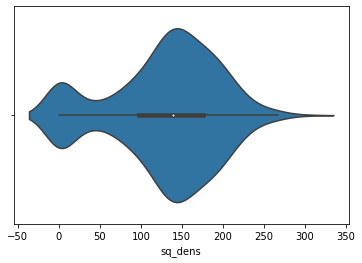

In [10]:
import seaborn as sns
ax = sns.violinplot(x=df["sq_dens"])

In [13]:
secc_cloro = folium.Map(location=[37.3882,-5.9699], zoom_start=13, tiles="cartodbpositron");

folium.Choropleth(
    geo_data = sev_secc,
    data = df, 
    columns = ["FID", "sq_dens"],
    key_on = "feature.properties.FID", 
    fill_color = "BuPu",
    fill_opacity = 0.4,
    line_opacity = 1,
    legend_name = "Valores de DENSIDAD",
    smooth_factor = 1
).add_to(secc_cloro);

secc_cloro